In [1]:
# Necessary library imports required for Exploratory Data Analysis

import pandas as pd
import numpy as np

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import countplot
from matplotlib.pyplot import figure, show
# set seaborn style because it prettier
sns.set()



# warnings
import warnings
import gc
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset which is in csv(comma separated values)format
data = pd.read_csv('Dataset.csv', sep=',')

In [3]:
# Show First 10 rows present in the dataset
data.head(10)

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.000000,50.0,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.000000,25.0,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.000000,10.0,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.000000,30.0,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.000000,15.0,0,0,0,0,0
5,298ca2045d174f8a158961806ffc4ef96fad02d71a6b84...,1,0,1.0,0.0,1.0,1.000000,0.0,0,0,0,0,0
6,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,1,2,29.0,29.0,58.0,29.000000,14.5,0,0,0,0,0
7,4385fcf8b14497d0659adccfe06ae7e38e0b5dc95ff8a1...,1,1,1.0,1.0,2.0,1.000000,1.0,0,0,0,0,0
8,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,1,1,28.0,10.0,38.0,28.000000,10.0,0,0,0,0,0
9,a3b0e9e7cddbbe78270fa4182a7675ff00b92872d8df7d...,3,0,61.0,0.0,61.0,20.333333,0.0,0,0,0,0,0


In [4]:
# Shape of the dataset i.e number of rows and columns present in the dataset 
data.shape

(30248134, 13)

In [5]:
# Information about the data columns present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30248134 entries, 0 to 30248133
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   tx_hash               object 
 1   indegree              int64  
 2   outdegree             int64  
 3   in_btc                float64
 4   out_btc               float64
 5   total_btc             float64
 6   mean_in_btc           float64
 7   mean_out_btc          float64
 8   in_malicious          int64  
 9   out_malicious         int64  
 10  is_malicious          int64  
 11  out_and_tx_malicious  int64  
 12  all_malicious         int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.9+ GB


In [6]:
# To Check if there's any missing data present in the dataset
data.isna().sum()

tx_hash                 0
indegree                0
outdegree               0
in_btc                  0
out_btc                 0
total_btc               0
mean_in_btc             0
mean_out_btc            0
in_malicious            0
out_malicious           0
is_malicious            0
out_and_tx_malicious    0
all_malicious           0
dtype: int64

In [7]:
# Description about dataset
data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07
mean,2.148699e+00,2.148699e+00,5.484150e+01,5.484150e+01,1.096830e+02,4.923980e+01,2.877087e+01,4.039919e-05,2.148893e-06,1.553815e-06,3.570468e-06,4.383741e-05
std,7.421447e+00,4.512048e+00,1.303303e+03,1.301473e+03,2.602527e+03,9.729210e+02,7.125567e+02,6.355907e-03,1.465909e-03,1.246520e-03,1.889565e-03,6.620838e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.000000e-01,9.950000e-02,2.058720e-01,6.400000e-02,5.025776e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,2.000000e+00,9.325000e-01,9.590000e-01,1.964759e+00,5.350261e-01,4.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,8.591912e+00,9.063657e+00,1.840000e+01,5.614287e+00,4.519481e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.932000e+03,1.322000e+03,5.500000e+05,5.000207e+05,1.050000e+06,4.992596e+05,5.000000e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
# Better view of the data described
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00
mean,2.15,2.15,54.84,54.84,109.68,49.24,28.77,0.00,0.00,0.00,0.00,0.00
std,7.42,4.51,1303.30,1301.47,2602.53,972.92,712.56,0.01,0.00,0.00,0.00,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,0.10,0.10,0.21,0.06,0.05,0.00,0.00,0.00,0.00,0.00
50%,1.00,2.00,0.93,0.96,1.96,0.54,0.49,0.00,0.00,0.00,0.00,0.00
75%,2.00,2.00,8.59,9.06,18.40,5.61,4.52,0.00,0.00,0.00,0.00,0.00
max,1932.00,1322.00,550000.00,500020.70,1050000.00,499259.59,500000.00,1.00,1.00,1.00,1.00,1.00


<AxesSubplot:>

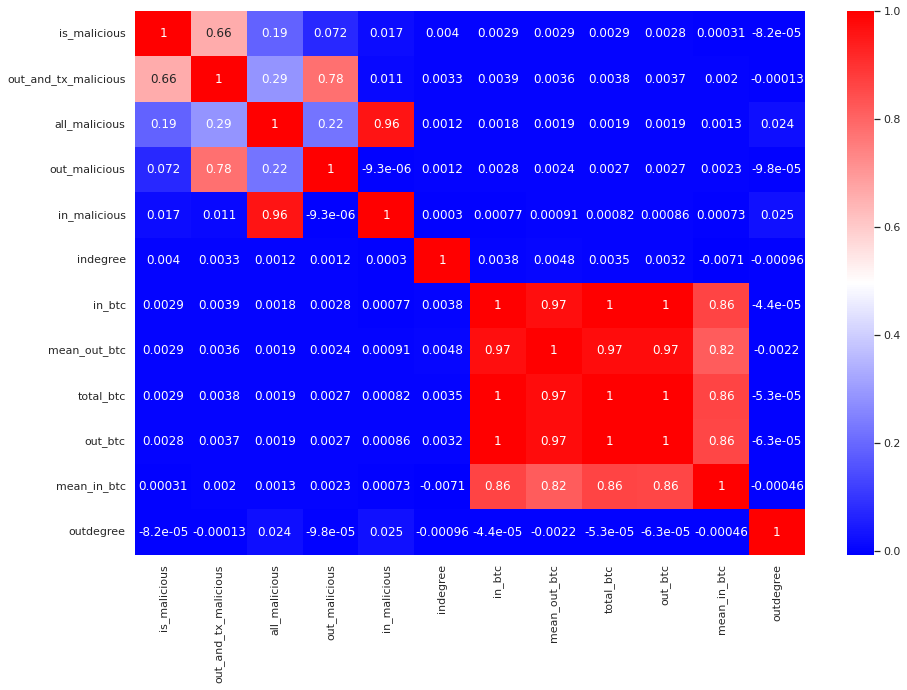

In [10]:
 #Quality correlation matrix
k = 13 #number of variables for heatmap
cols = data.corr().nlargest(k, 'is_malicious')['is_malicious'].index
cm = data[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap = 'bwr')

In [11]:
data1=data.iloc[:,1:13]

sc_data = data1.copy()
pd.options.display.float_format = '{:.2f}'.format

In [13]:
# Data Scaling

# nplog1p is better than nplog
sc_data['indegree'] = np.log1p(sc_data['indegree'])
sc_data['outdegree']= np.log1p(sc_data['outdegree'])
sc_data['in_btc'] = np.log1p(sc_data['in_btc'])
sc_data['out_btc']= np.log1p(sc_data['out_btc'])
sc_data['total_btc']= np.log1p(sc_data['total_btc'])
sc_data['mean_in_btc']= np.log1p(sc_data['mean_in_btc'])
sc_data['mean_out_btc']= np.log1p(sc_data['mean_out_btc'])

sc_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00
mean,0.64,0.72,0.66,0.66,1.73,1.17,1.05,0.00,0.00,0.00,0.00,0.00
std,0.20,0.12,0.59,0.60,1.80,1.52,1.39,0.01,0.00,0.00,0.00,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.53,0.74,0.09,0.09,0.19,0.06,0.05,0.00,0.00,0.00,0.00,0.00
50%,0.53,0.74,0.51,0.51,1.09,0.43,0.40,0.00,0.00,0.00,0.00,0.00
75%,0.74,0.74,1.18,1.20,2.97,1.89,1.71,0.00,0.00,0.00,0.00,0.00
max,2.15,2.10,2.65,2.65,13.86,13.12,13.12,1.00,1.00,1.00,1.00,1.00


In [15]:
from sklearn.preprocessing import RobustScaler

# Robust scaler as it is less prone to outliers
scaler = RobustScaler()
sc_data = pd.DataFrame(scaler.fit_transform(sc_data),columns=sc_data.columns)
sc_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00,30248134.00
mean,0.54,-0.02,0.14,0.14,0.23,0.41,0.40,0.00,0.00,0.00,0.00,0.00
std,0.93,0.12,0.54,0.54,0.65,0.83,0.84,0.01,0.00,0.00,0.00,0.01
min,-2.45,-0.74,-0.46,-0.46,-0.39,-0.23,-0.24,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,-0.38,-0.38,-0.32,-0.20,-0.21,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,0.62,0.62,0.68,0.80,0.79,0.00,0.00,0.00,0.00,0.00
max,7.55,1.36,1.97,1.93,4.60,6.95,7.67,1.00,1.00,1.00,1.00,1.00


In [17]:
sc_data['is_malicious'] = data['out_and_tx_malicious']

In [18]:
sc_data.head(10)

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,-2.45,-0.21,-0.46,0.98,1.02,-0.23,2.13,0.00,0.00,0,0.00,0.00
1,0.00,0.00,1.00,0.98,1.27,1.92,1.72,0.00,0.00,0,0.00,0.00
2,0.00,-0.21,0.66,0.64,0.70,1.08,1.20,0.00,0.00,0,0.00,0.00
3,0.00,-0.21,0.96,0.88,1.14,1.80,1.83,0.00,0.00,0,0.00,0.00
4,0.00,0.00,0.90,0.88,1.09,1.64,1.43,0.00,0.00,0,0.00,0.00
5,0.00,-0.74,0.02,-0.46,-0.14,0.14,-0.24,0.00,0.00,0,0.00,0.00
6,0.00,0.00,0.89,0.87,1.08,1.63,1.41,0.00,0.00,0,0.00,0.00
7,0.00,-0.21,0.02,0.01,0.00,0.14,0.18,0.00,0.00,0,0.00,0.00
8,0.00,-0.21,0.89,0.64,0.93,1.61,1.20,0.00,0.00,0,0.00,0.00
9,1.60,-0.74,1.03,-0.46,1.09,1.44,-0.24,0.00,0.00,0,0.00,0.00


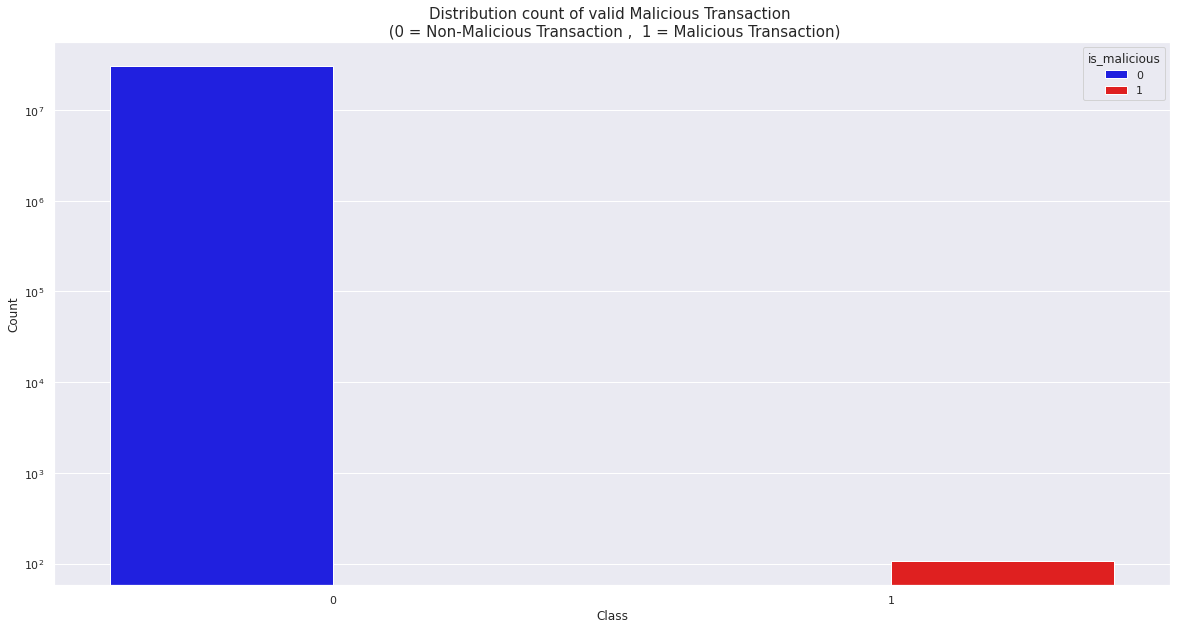

In [22]:
colors = ["#0000FF", "#FF0000"]

plt.figure(figsize=(20, 10))
ax = sns.countplot('is_malicious', data=sc_data, palette=colors, log=True, hue = "is_malicious")
plt.title('Distribution count of valid Malicious Transaction \n (0 = Non-Malicious Transaction ,  1 = Malicious Transaction)', fontsize=15)
ax.set(xlabel='Class', ylabel='Count')
plt.show()

In [24]:
# Count of malicious transaction
sc_data.is_malicious.value_counts()

0    30248026
1         108
Name: is_malicious, dtype: int64

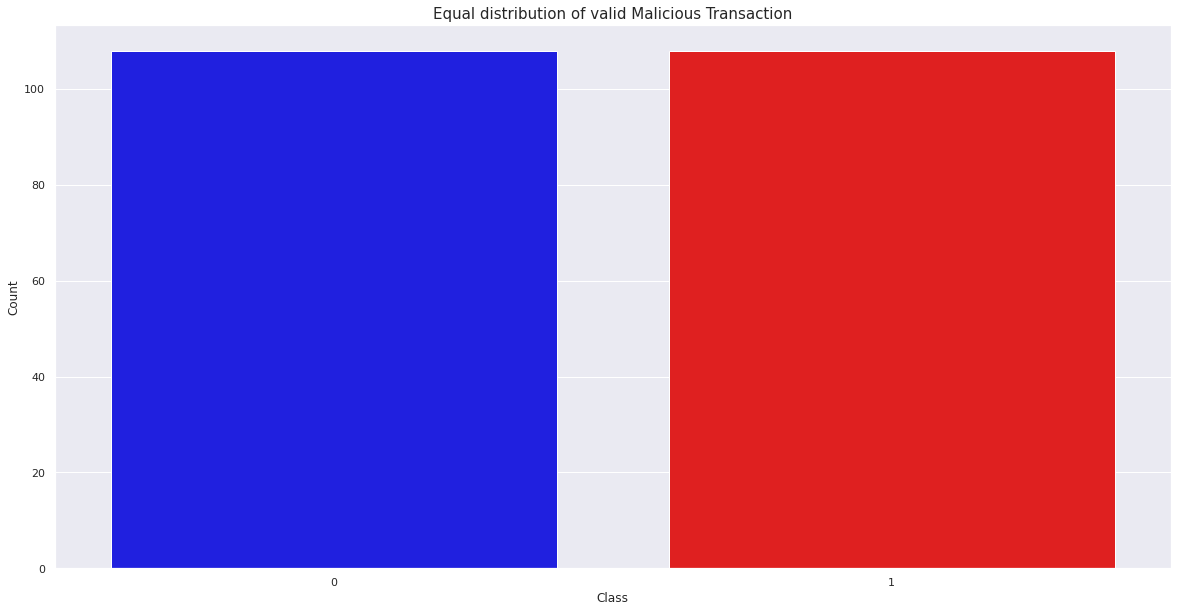

In [27]:
# As the classes are skewed. They needs to be equally distributed.

plt.figure(figsize=(20, 10))
data_fraud = sc_data.loc[sc_data['is_malicious'] == 1]
data_non_fraud = sc_data.loc[sc_data['is_malicious'] == 0].sample(len(data_fraud))
datanew = pd.concat([data_fraud, data_non_fraud])

ax = sns.countplot('is_malicious', data=datanew, palette=colors)
ax.set(xlabel='Class', ylabel='Count')
plt.title('Equal distribution of valid Malicious Transaction', fontsize=15)

plt.show()

In [29]:
# Scaled data pair
scd_pair = sc_data.copy()
scd_pair['is_malicious'] = scd_pair['is_malicious'].astype(str).str.replace('0','Non-malicious')
scd_pair['is_malicious'] = scd_pair['is_malicious'].astype(str).str.replace('1','Malicious')
scd_pair.rename(columns={'is_malicious':'Malicious-Transactions'}, inplace=True)
scd_pair.head(10)

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,Malicious-Transactions,out_and_tx_malicious,all_malicious
0,-2.45,-0.21,-0.46,0.98,1.02,-0.23,2.13,0.00,0.00,Non-malicious,0.00,0.00
1,0.00,0.00,1.00,0.98,1.27,1.92,1.72,0.00,0.00,Non-malicious,0.00,0.00
2,0.00,-0.21,0.66,0.64,0.70,1.08,1.20,0.00,0.00,Non-malicious,0.00,0.00
3,0.00,-0.21,0.96,0.88,1.14,1.80,1.83,0.00,0.00,Non-malicious,0.00,0.00
4,0.00,0.00,0.90,0.88,1.09,1.64,1.43,0.00,0.00,Non-malicious,0.00,0.00
5,0.00,-0.74,0.02,-0.46,-0.14,0.14,-0.24,0.00,0.00,Non-malicious,0.00,0.00
6,0.00,0.00,0.89,0.87,1.08,1.63,1.41,0.00,0.00,Non-malicious,0.00,0.00
7,0.00,-0.21,0.02,0.01,0.00,0.14,0.18,0.00,0.00,Non-malicious,0.00,0.00
8,0.00,-0.21,0.89,0.64,0.93,1.61,1.20,0.00,0.00,Non-malicious,0.00,0.00
9,1.60,-0.74,1.03,-0.46,1.09,1.44,-0.24,0.00,0.00,Non-malicious,0.00,0.00


<AxesSubplot:>

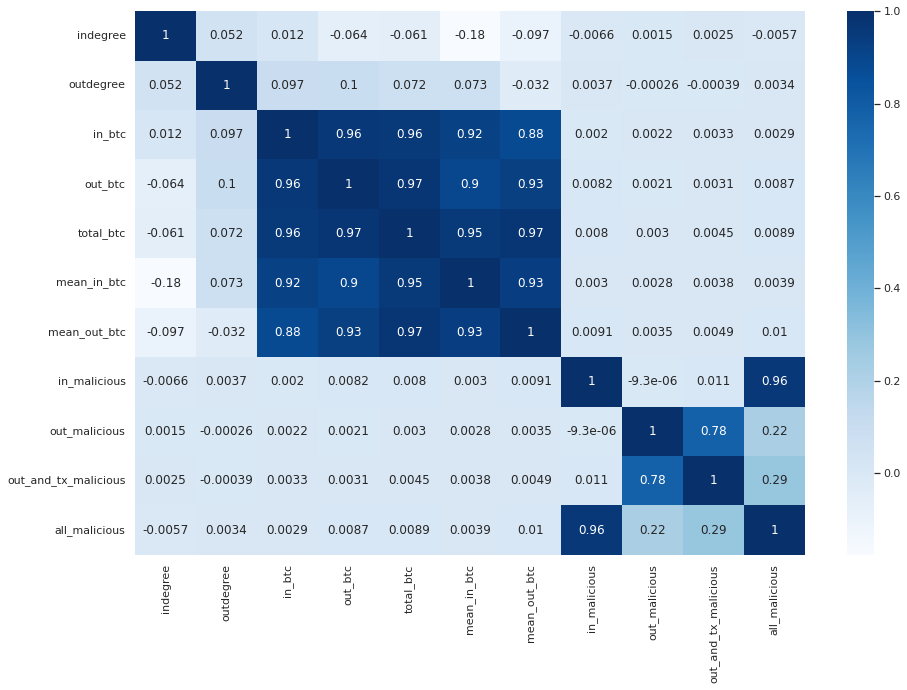

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(scd_pair.corr(),cmap='Blues',annot=True) 

In [ ]:
# Negative Correlations: indegree, outdegree negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

# Positive Correlations: in_btc, mean_in_btc, out_btc, mean_out_btc and total_btc are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

# BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions

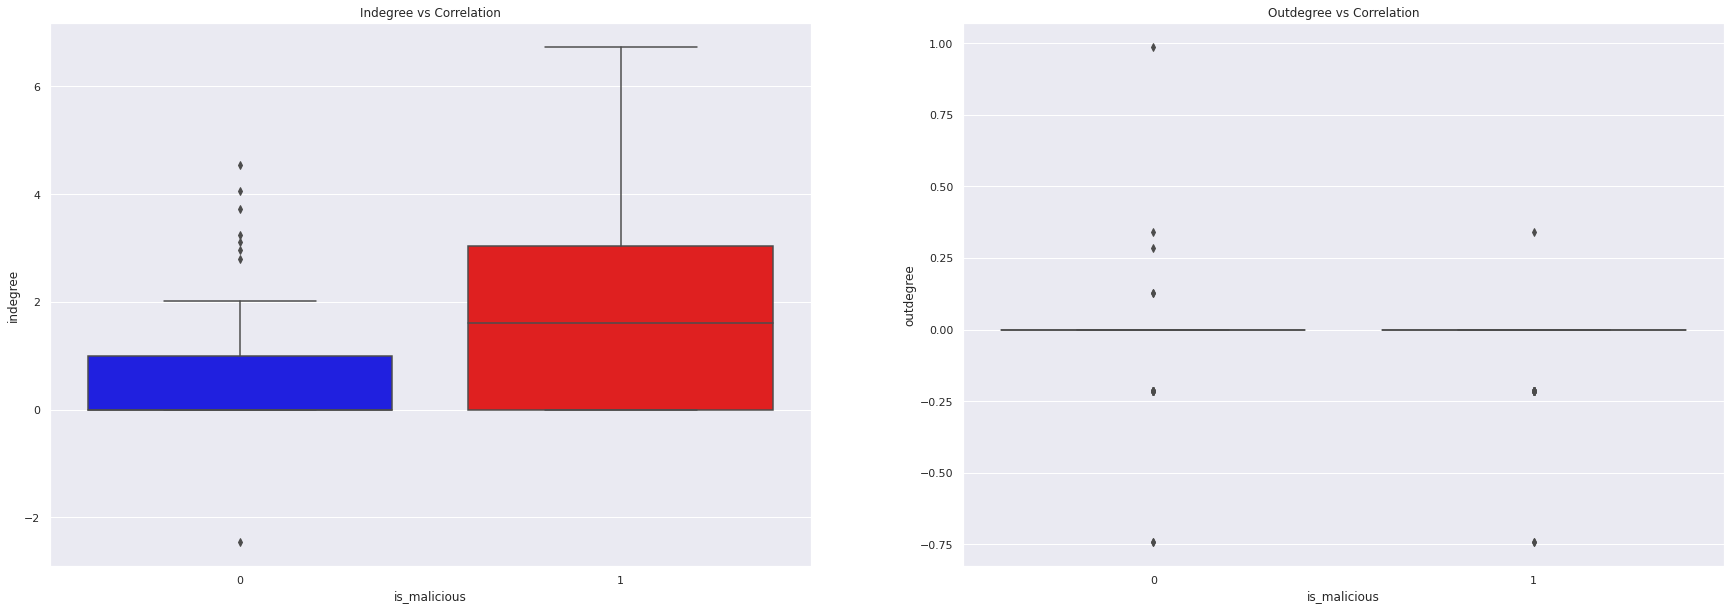

In [35]:
f, axes = plt.subplots(ncols=2, figsize=(30,10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="is_malicious", y="indegree", data=datanew, palette=colors, ax=axes[0])
axes[0].set_title('Indegree vs Correlation')

sns.boxplot(x="is_malicious", y="outdegree", data=datanew, palette=colors, ax=axes[1])
axes[1].set_title('Outdegree vs Correlation')

plt.show()


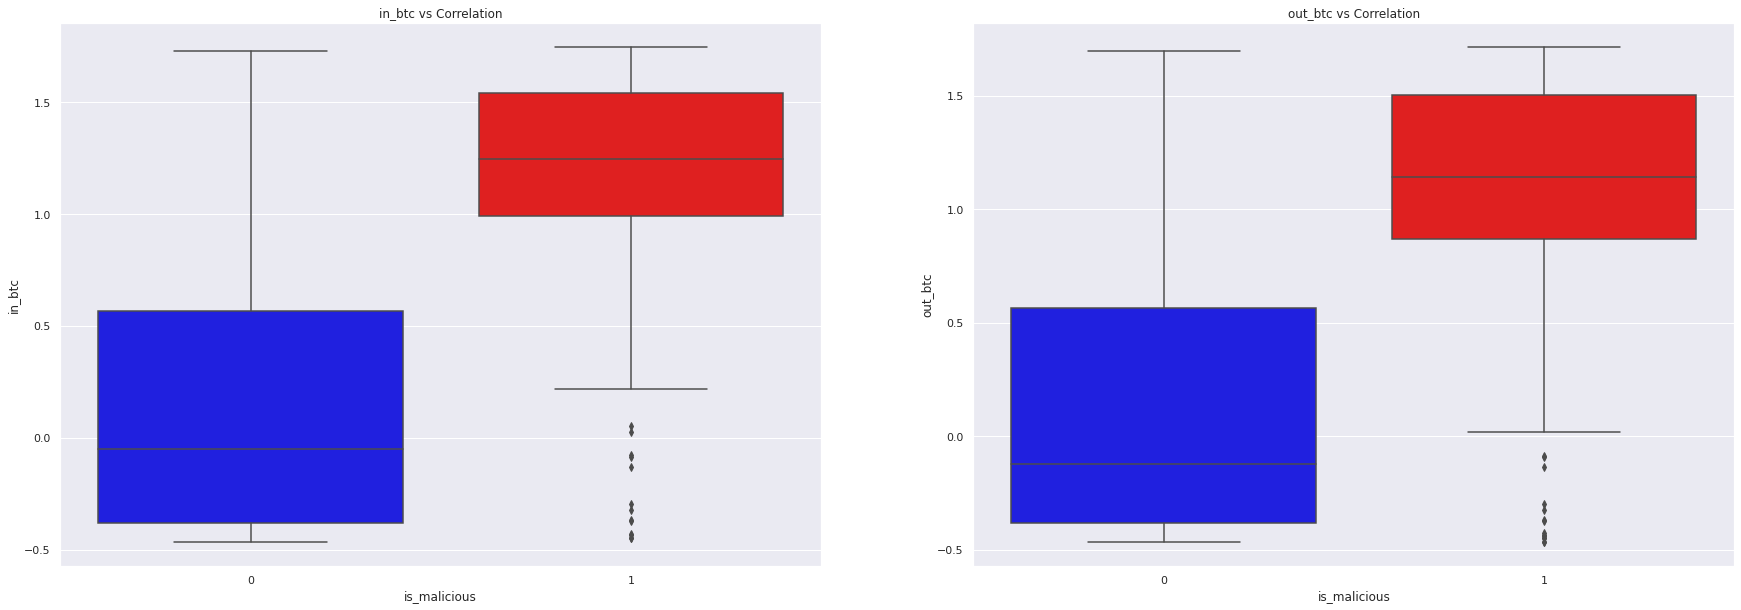

In [36]:
f, axes = plt.subplots(ncols=2, figsize=(30,10))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="is_malicious", y="in_btc", data=datanew, palette=colors, ax=axes[0])
axes[0].set_title('in_btc vs Correlation')

sns.boxplot(x="is_malicious", y="out_btc", data=datanew, palette=colors, ax=axes[1])
axes[1].set_title('out_btc vs Correlation')

plt.show()

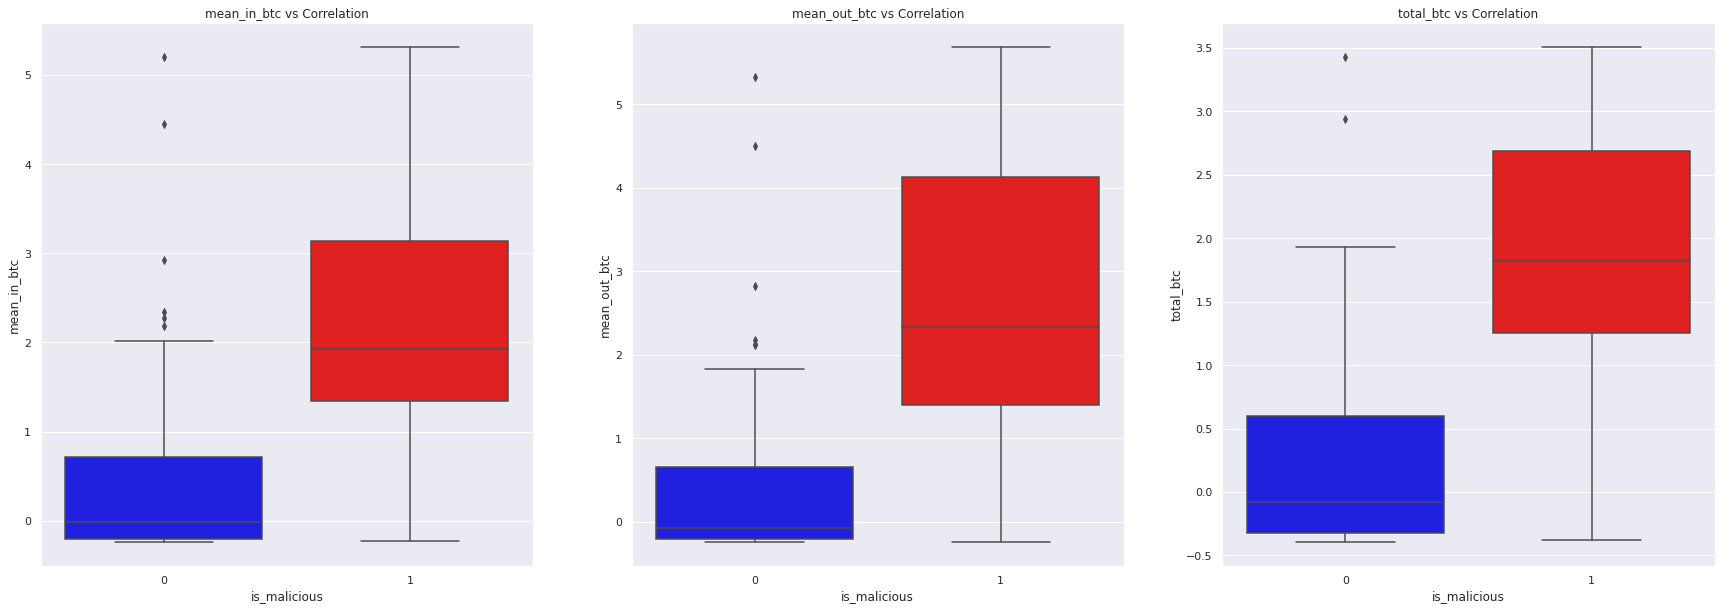

In [37]:
f, axes = plt.subplots(ncols=3, figsize=(30,10))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="is_malicious", y="mean_in_btc", data=datanew, palette=colors, ax=axes[0])
axes[0].set_title('mean_in_btc vs Correlation')

sns.boxplot(x="is_malicious", y="mean_out_btc", data=datanew, palette=colors, ax=axes[1])
axes[1].set_title('mean_out_btc vs Correlation')

sns.boxplot(x="is_malicious", y="total_btc", data=datanew, palette=colors, ax=axes[2])
axes[2].set_title('total_btc vs Correlation')

plt.show()

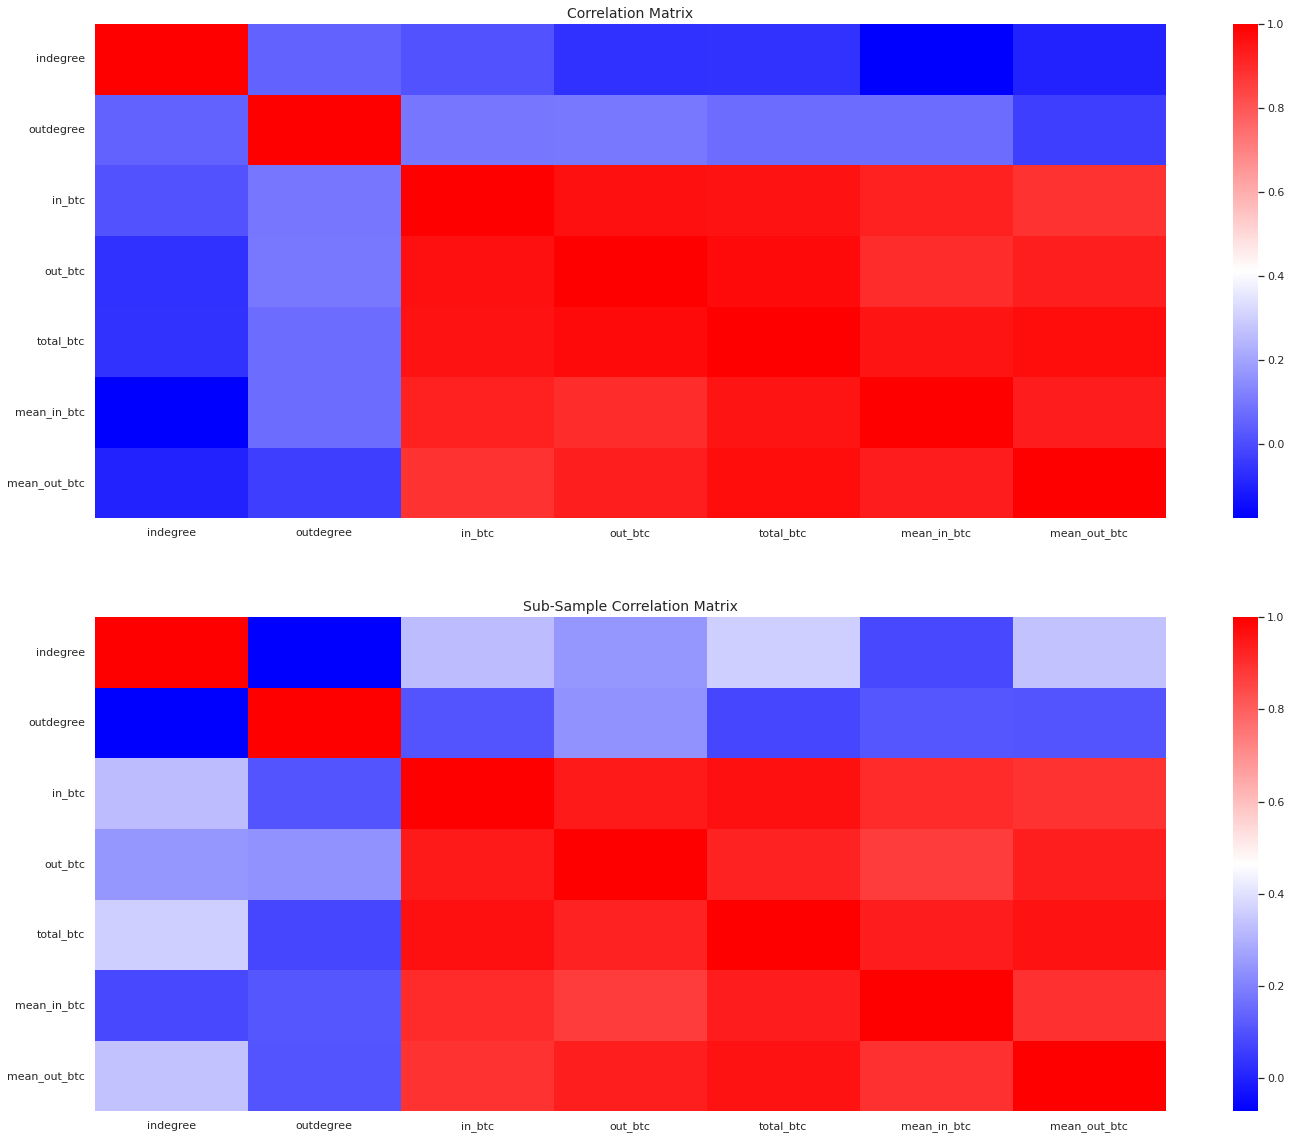

In [41]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = sc_data.iloc[:,0:7].corr()
sns.heatmap(corr, cmap='bwr', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix", fontsize=14)


sub_sample_corr = datanew.iloc[:,0:7].corr()
sns.heatmap(sub_sample_corr, cmap='bwr', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Sub-Sample Correlation Matrix', fontsize=14)
plt.show()